In [27]:
#import dataset
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#to ignore warnings for user convinence
import warnings
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv(r"C:\Users\rajan\Downloads\occupancy_data\datatraining.txt")

In [16]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [18]:
df2 = pd_df.iloc[:, 1:7]

In [19]:
df2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [23]:
#check for null values
print(df2.isna().sum())

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


In [24]:
df2.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [30]:
features = ['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']

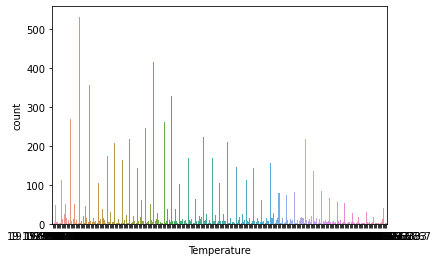

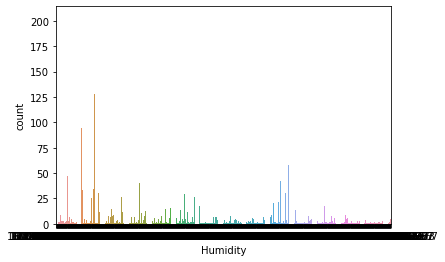

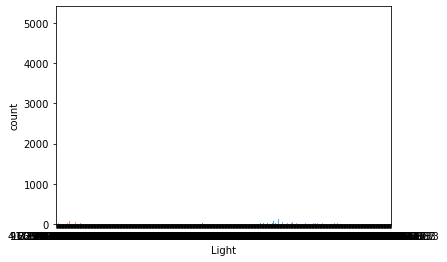

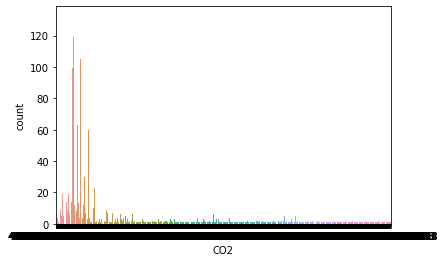

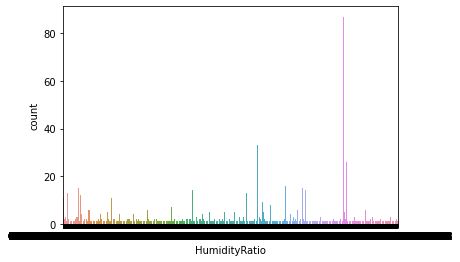

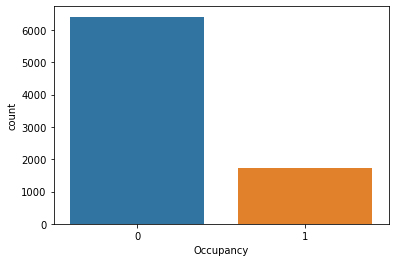

In [31]:
for feature in features:
    sns.countplot(df2[feature])
    plt.show()

In [33]:
dataframe=df2.values
X=dataframe[:,0:5]
y=dataframe[:,5]

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

n_neighbors=np.array(range(2,50))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [36]:
#get best score
print(grid.best_score_)
print(grid.best_params_)

0.9727396406954419
{'n_neighbors': 45}


In [64]:
kfold=KFold(n_splits=10)
knn=KNeighborsClassifier(n_neighbors=23)
result=cross_val_score(knn,X,y,cv=kfold)

In [65]:
print(result.mean())

0.9812150856936132


In [66]:
knn.fit(X,y)
pred=knn.predict(X)
pred[15]

1.0

In [75]:
knn.fit(X,y)
pred_=knn.predict(X)
df2['predicted_type']=pred_
df2.iloc[0:20:,]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,predicted_type
1,23.180,27.272000,426.0,721.250000,0.004793,1,1.0
2,23.150,27.267500,429.5,714.000000,0.004783,1,1.0
3,23.150,27.245000,426.0,713.500000,0.004779,1,1.0
4,23.150,27.200000,426.0,708.250000,0.004772,1,1.0
5,23.100,27.200000,426.0,704.500000,0.004757,1,1.0
6,23.100,27.200000,419.0,701.000000,0.004757,1,1.0
7,23.100,27.200000,419.0,701.666667,0.004757,1,1.0
8,23.100,27.200000,419.0,699.000000,0.004757,1,1.0
9,23.100,27.200000,419.0,689.333333,0.004757,1,1.0
10,23.075,27.175000,419.0,688.000000,0.004745,1,1.0


In [71]:
knn.fit(X,y)
pred_=knn.predict(X)
df2['predicted_type']=pred_
df2.iloc[20:40:,]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,predicted_type
21,22.890000,27.390000,0.0,689.500000,0.004730,0,0.0
22,22.890000,27.390000,0.0,689.000000,0.004730,0,0.0
23,22.890000,27.445000,0.0,691.000000,0.004739,0,0.0
24,22.890000,27.500000,0.0,688.000000,0.004749,0,0.0
25,22.890000,27.500000,0.0,689.500000,0.004749,0,0.0
26,22.790000,27.445000,0.0,689.000000,0.004710,0,0.0
27,22.790000,27.500000,0.0,685.666667,0.004720,0,0.0
28,22.790000,27.500000,0.0,687.000000,0.004720,0,0.0
29,22.790000,27.500000,0.0,688.000000,0.004720,0,0.0
30,22.745000,27.500000,0.0,670.000000,0.004707,0,0.0


In [73]:
knn.fit(X,y)
pred_=knn.predict(X)
df2['predicted_type']=pred_
df2.iloc[40:60:,]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,predicted_type
41,22.60,27.445000,0.0,655.000000,0.004656,0,0.0
42,22.60,27.445000,0.0,654.250000,0.004656,0,0.0
43,22.60,27.390000,0.0,648.000000,0.004646,0,0.0
44,22.50,27.323333,0.0,648.666667,0.004607,0,0.0
45,22.50,27.445000,0.0,646.000000,0.004627,0,0.0
46,22.50,27.500000,0.0,646.000000,0.004637,0,0.0
47,22.50,27.445000,0.0,641.500000,0.004627,0,0.0
48,22.39,27.290000,0.0,639.000000,0.004570,0,0.0
49,22.50,27.500000,0.0,640.000000,0.004637,0,0.0
50,22.39,27.340000,0.0,630.500000,0.004579,0,0.0


In [76]:
knn.fit(X,y)
pred_=knn.predict(X)
df2['predicted_type']=pred_
df2.iloc[60:8143:,]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,predicted_type
61,22.34,27.390000,0.0,626.500000,0.004573,0,0.0
62,22.29,27.390000,0.0,622.000000,0.004559,0,0.0
63,22.39,27.390000,0.0,620.000000,0.004587,0,0.0
64,22.29,27.390000,0.0,621.500000,0.004559,0,0.0
65,22.29,27.356667,0.0,616.333333,0.004553,0,0.0
...,...,...,...,...,...,...,...
8139,21.05,36.097500,433.0,787.250000,0.005579,1,1.0
8140,21.05,35.995000,433.0,789.500000,0.005563,1,1.0
8141,21.10,36.095000,433.0,798.500000,0.005596,1,1.0
8142,21.10,36.260000,433.0,820.333333,0.005621,1,1.0
